In [39]:
import pandas as pd
from citipy import citipy
import matplotlib.pyplot as plt
%notebook inline
import random
from config import api_key
import openweathermapy.core as owm

In [2]:
#seedify random numbers to obtain repeatable results
random.seed(a=20)

In [3]:
city_list=[];country_list=[]
for i in range(0,1200):
    lat=random.randrange(-90,90)
    long=random.randrange(-180,180)
    city=citipy.nearest_city(lat,long)
    city_list.append(city.city_name)
    country_list.append(city.country_code)
df=pd.DataFrame({"City":city_list,"Country":country_list}) 
df.head()

,City,Country
0,yellowknife,ca
1,noumea,nc
2,tuktoyaktuk,ca
3,taman,id
4,avarua,ck


In [4]:
# Counting unique combinations of city and country
grped=df.groupby(["Country","City"])
ds=grped.size()
len(ds)

510

In [5]:
df_=ds.to_frame().reset_index()
df_unique_cities=df_[["Country","City"]]
# Creating column with city,country in the format required by openweathermapy
df_unique_cities['city,country']=""
for index,row in df_unique_cities.iterrows():
    row['city,country']=f"{row['City']},{row['Country']}"
df_unique_cities['Lat']="";df_unique_cities['Long']="";df_unique_cities['Temperature(F)']="";df_unique_cities['Humidity(%)']=""
df_unique_cities['Cloudiness(%)']="";df_unique_cities['Wind Speed(mph)']=""
df_unique_cities.head()

,Country,City,"city,country",Lat,Long,Temperature(F),Humidity(%),Cloudiness(%),Wind Speed(mph)
0,ae,sharjah,"sharjah,ae",,,,,,
1,af,baraki barak,"baraki barak,af",,,,,,
2,ag,codrington,"codrington,ag",,,,,,
3,ai,the valley,"the valley,ai",,,,,,
4,ao,lucapa,"lucapa,ao",,,,,,


# Pulling Data From openweathermap api

In [16]:
import urllib
settings = {"APPID": api_key, "units": "imperial"}
# keys = ["coord.lon","coord.lat","clouds.all","main.temp", "main.humidity", "wind.speed"]
for index,row in df_unique_cities.iterrows():
    try:
        data=owm.get_current(row['city,country'],**settings)
        row['Lat']=data("coord.lat");row['Long']=data("coord.lat")
        row['Temperature(F)']=data("main.temp");row['Humidity(%)']=data("main.humidity")
        row['Cloudiness(%)']=data("clouds.all");row['Wind Speed(mph)']=data("wind.speed")
        #     data.get_many(keys)
    except urllib.error.HTTPError as err:
        if err==404:
            print(row['city,country'])
            continue
        else:
            print(err)
            print(row['city,country'])


HTTP Error 404: Not Found
codrington,ag
HTTP Error 404: Not Found
ngukurr,au
HTTP Error 404: Not Found
acarau,br
HTTP Error 404: Not Found
igarape-miri,br
HTTP Error 404: Not Found
laguna,br
HTTP Error 404: Not Found
bokspits,bw
HTTP Error 404: Not Found
longlac,ca
HTTP Error 404: Not Found
louisbourg,ca
HTTP Error 404: Not Found
saint anthony,ca
HTTP Error 404: Not Found
lasa,cn
HTTP Error 404: Not Found
warqla,dz
HTTP Error 404: Not Found
kemijarvi,fi
HTTP Error 404: Not Found
illoqqortoormiut,gl
HTTP Error 404: Not Found
marathopolis,gr
HTTP Error 404: Not Found
bolungarvik,is
HTTP Error 404: Not Found
skagastrond,is
HTTP Error 404: Not Found
yomitan,jp
HTTP Error 404: Not Found
chardara,kz
HTTP Error 404: Not Found
karaton,kz
HTTP Error 404: Not Found
asfi,ma
HTTP Error 404: Not Found
mananara,mg
HTTP Error 404: Not Found
taolanaro,mg
HTTP Error 404: Not Found
tsihombe,mg
HTTP Error 404: Not Found
grand river south east,mu
HTTP Error 404: Not Found
canitas,mx
HTTP Error 404: Not Fo

In [30]:
#changing the datatype from str to numeric
df_unique_cities[["Lat","Long","Temperature(F)","Humidity(%)","Cloudiness(%)","Wind Speed(mph)"]]=df_unique_cities[["Lat","Long","Temperature(F)","Humidity(%)","Cloudiness(%)",
                                                                                                                    "Wind Speed(mph)"]].apply(pd.to_numeric,errors="coerce")
df_unique_cities.count()

Country            510
City               510
city,country       510
Lat                449
Long               449
Temperature(F)     449
Humidity(%)        449
Cloudiness(%)      449
Wind Speed(mph)    449
dtype: int64

In [61]:
df_unique_cities=df_unique_cities.dropna(axis=0,how="any")
df_unique_cities.to_csv("Output/city_weatherdata.csv")
df_unique_cities.head()

,Country,City,"city,country",Lat,Long,Temperature(F),Humidity(%),Cloudiness(%),Wind Speed(mph)
0,ae,sharjah,"sharjah,ae",25.36,25.36,88.20,46.0,0.0,3.36
1,af,baraki barak,"baraki barak,af",33.97,33.97,62.60,39.0,0.0,4.70
3,ai,the valley,"the valley,ai",18.22,18.22,82.47,74.0,40.0,13.87
4,ao,lucapa,"lucapa,ao",-8.42,-8.42,64.81,77.0,0.0,1.70
5,ao,namibe,"namibe,ao",-15.19,-15.19,71.83,100.0,0.0,2.15


# City Latitude Vs Max Temperature (F)

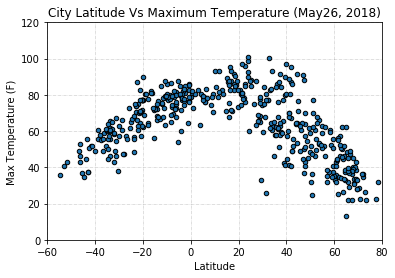

In [62]:
df_unique_cities.plot(kind="scatter",x="Lat",y="Temperature(F)",facecolor="b",edgecolor='black')
plt.title("City Latitude Vs Maximum Temperature (May26, 2018)")
plt.xlabel("Latitude");plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-.',color='black',linewidth=.5,alpha=.25)
plt.xlim(-60,80);plt.ylim(0,120)
plt.savefig("Output/latvstemp.png")



# City Latitude Vs Humidity Plot

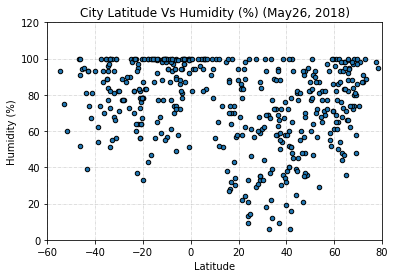

In [63]:
df_unique_cities.plot(kind="scatter",x="Lat",y="Humidity(%)",facecolor="b",edgecolor='black')
plt.title("City Latitude Vs Humidity (%) (May26, 2018)")
plt.xlabel("Latitude");plt.ylabel("Humidity (%)")
plt.grid(linestyle='-.',color='black',linewidth=.5,alpha=.25)
plt.xlim(-60,80);plt.ylim(0,120)
plt.savefig("Output/latvshumidity.png")


# City Latitude Vs Cloudiness Plot

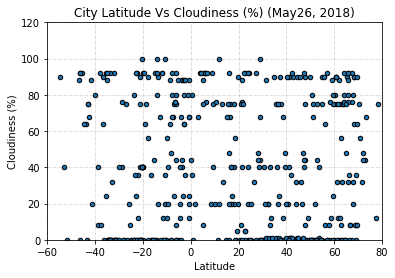

In [64]:
df_unique_cities.plot(kind="scatter",x="Lat",y="Cloudiness(%)",facecolor="b",edgecolor='black')
plt.title("City Latitude Vs Cloudiness (%) (May26, 2018)")
plt.xlabel("Latitude");plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-.',color='black',linewidth=.5,alpha=.25)
plt.xlim(-60,80);plt.ylim(0,120)
plt.savefig("Output/latvscloudiness.png")


# City Latitude Vs Wind Speed Plot

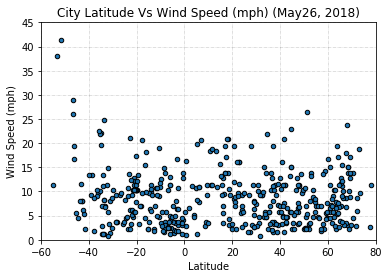

In [65]:
df_unique_cities.plot(kind="scatter",x="Lat",y="Wind Speed(mph)",facecolor="b",edgecolor='black')
plt.title("City Latitude Vs Wind Speed (mph) (May26, 2018)")
plt.xlabel("Latitude");plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle='-.',color='black',linewidth=.5,alpha=.25)
plt.xlim(-60,80);plt.ylim(0,45)
plt.savefig("Output/latvswind.png")


# Conclusions

    1. The cities near equator (0 latitude) have higher maximum temperature, with temperature falling down as the cities go farther from equator.
    2. Humidity and cloudiness show no correlation to the latitudes. Here the data is quite evenly distributed.
    3. Wind speed in most cities are less than 15mph which shows good mild weather today for most places. However some places have wind speed in higher range (15-25mph). In general we do not see any coorelation between wind speed and the latitude.